In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("Resources/electricity_ml.csv")

In [3]:
df.head()

,Unnamed: 0,Date,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,...,Holiday_Good Friday,Holiday_Holy Saturday,Holiday_June Bank Holiday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Eve,Holiday_None,Holiday_October Bank Holiday,Holiday_St Patrick's Day,Holiday_St Stephen's Day
0,0,2011-11-01 00:00:00,0,1,44,1,11,2011,0,315.31,...,0,0,0,0,0,0,1,0,0,0
1,1,2011-11-01 00:30:00,0,1,44,1,11,2011,1,321.80,...,0,0,0,0,0,0,1,0,0,0
2,2,2011-11-01 01:00:00,0,1,44,1,11,2011,2,328.57,...,0,0,0,0,0,0,1,0,0,0
3,3,2011-11-01 01:30:00,0,1,44,1,11,2011,3,335.60,...,0,0,0,0,0,0,1,0,0,0
4,4,2011-11-01 02:00:00,0,1,44,1,11,2011,4,342.90,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
#Viewing correlation of variables with price
df.corr()[['Price $']].sort_values(by='Price $', ascending=False)

,Price $
Price $,1.000000
NationalSystemLoad MWh,0.554203
PriceForecast$,0.553837
NationalLoadForecast,0.507688
HalfHourPeriod,0.393910
Temperature C,0.145086
Year,0.083925
Holiday_June Bank Holiday,0.032103
Holiday_May Day,0.031065
Holiday_St Patrick's Day,0.024772


In [6]:
#Setting up dependent and independent features
X = df.drop(["Price $","Date"], axis=1)
y = df["Price $"]

In [7]:
X.head()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,...,Holiday_Good Friday,Holiday_Holy Saturday,Holiday_June Bank Holiday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Eve,Holiday_None,Holiday_October Bank Holiday,Holiday_St Patrick's Day,Holiday_St Stephen's Day
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,...,0,0,0,0,0,0,1,0,0,0
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,...,0,0,0,0,0,0,1,0,0,0
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,...,0,0,0,0,0,0,1,0,0,0
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,...,0,0,0,0,0,0,1,0,0,0
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,...,0,0,0,0,0,0,1,0,0,0


In [8]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

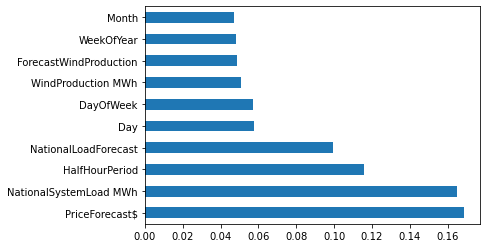

In [13]:
#plot graph of feature importances for better visualisation 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh') 
plt.show()

In [14]:
#Splitting data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [15]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [16]:
#Create parameters
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [17]:
rf_model = RandomForestRegressor()

In [18]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [19]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [123]:
#Best parameters from Randomised Cross Validation
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [98]:
#Using best_params as inputs for RandomForestRegressor model
rf_best = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25)

In [118]:
clf = rf_best.fit(X_train, y_train)


In [119]:
#RandomForestRegressor score with optimal parameters
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9491017031138848
Testing Score: 0.6675925642342322


In [105]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
lin_model = LinearRegression()
lin_reg = lin_model.fit(X_train_scaled, y_train)
lin_reg.score(X_test_scaled, y_test)



0.4502687016078434

In [127]:
predictions = clf.predict(X_test)

C:\Users\Aidan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


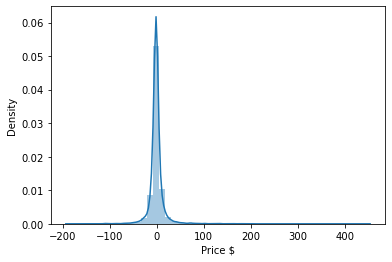

In [128]:
import seaborn as sns
sns.distplot(y_test - predictions)

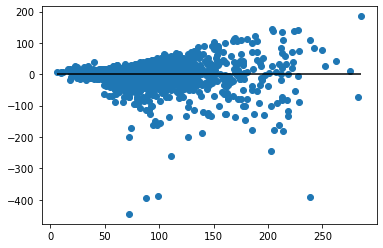

In [130]:
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

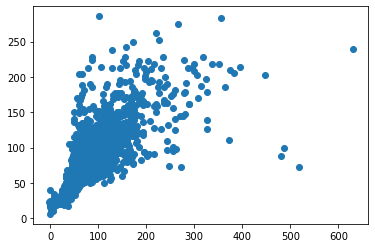

In [131]:
plt.scatter(y_test, predictions)